In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_d = pd.read_csv('data/Binance_ETHUSDT_d.csv')
df_h = pd.read_csv('data/Binance_ETHUSDT_1h.csv')

In [3]:
def to_datetime_day(df):
    
    df.reset_index(inplace=True)
    df.columns = df.iloc[0]
    df.drop(index = df.index[0:2], axis=0, inplace=True)
    
    df['date'] = df['date'].str[0:10]
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
    df.set_index('date', inplace = True)
    
    df.drop(df.columns[[0,1,-1,-2]], axis=1, inplace=True)
    
    for x in df.columns:
        df[x] = df[x].astype(float)
    
    return df

In [4]:
to_datetime_day(df_d)

,open,high,low,close,Volume ETH
date,,,,,
2022-01-10,3151.97,3185.00,2928.83,3082.68,529818.3866
2022-01-09,3080.98,3211.72,3057.35,3151.97,275874.1643
2022-01-08,3198.68,3250.00,3000.00,3080.95,400692.1061
2022-01-07,3406.81,3416.76,3064.42,3199.24,669631.7262
2022-01-06,3539.82,3550.43,3300.00,3406.81,496745.7413
...,...,...,...,...,...
2017-08-21,299.10,346.52,294.60,323.29,5134.5400
2017-08-20,290.91,300.53,282.85,299.10,2469.4900
2017-08-19,293.96,299.90,278.00,290.91,2140.0800


In [5]:
def to_datetime_hour(df):
    
    df.reset_index(inplace=True)
    df.columns = df.iloc[0]
    df.drop(index = df.index[0:2], axis=0, inplace=True)
    
    def datetime_func(x):
        if 'AM' in x:
            return pd.to_datetime(x[0:13]+':00:00 AM').strftime('%Y-%m-%d %H:%M:%S')
        elif 'PM' in x:
            return pd.to_datetime(x[0:13]+':00:00 PM').strftime('%Y-%m-%d %H:%M:%S')
        else:
            return pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S')
    
    df['date'] = df['date'].apply(datetime_func)
    df.set_index('date', inplace = True)
    df.drop(df.columns[[0,1,-1,-2]], axis=1, inplace=True)
    
    for x in df.columns:
        df[x] = df[x].astype(float)
    
    return df

In [6]:
to_datetime_hour(df_h)

,open,high,low,close,Volume ETH
date,,,,,
2022-01-10 23:00:00,3062.73,3088.01,3054.06,3082.68,9189.4677
2022-01-10 22:00:00,3074.65,3084.96,3056.33,3062.73,6294.9157
2022-01-10 21:00:00,3082.68,3096.15,3068.12,3074.65,13234.7443
2022-01-10 20:00:00,3029.75,3088.00,3019.17,3082.68,15604.1474
2022-01-10 19:00:00,3042.90,3056.28,3020.21,3029.75,10499.1698
...,...,...,...,...,...
2017-08-17 08:00:00,307.96,309.97,307.00,308.62,150.7500
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,753.1900
2017-08-17 06:00:00,303.10,304.44,301.90,302.68,302.5100


In [7]:
def to_datetime_minute(df):
    
    df.reset_index(inplace=True)
    df.columns = df.iloc[0]
    df.drop(index = df.index[0:2], axis=0, inplace=True)
    
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
    df.set_index('date', inplace = True)
    df.drop(df.columns[[0,1,-1,-2]], axis=1, inplace=True)
    
    for x in df.columns:
        df[x] = df[x].astype(float)
    
    return df

In [9]:
df = df_d.copy()

In [77]:
target = df[['close']]

<AxesSubplot:xlabel='date'>

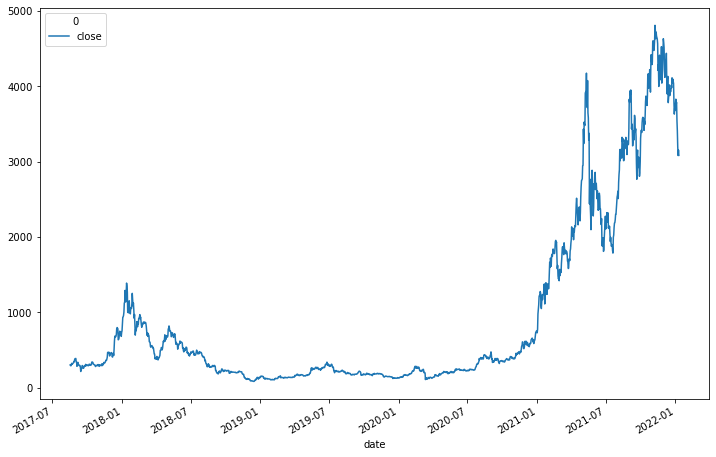

In [16]:
target.plot(figsize=(12,8))

In [78]:
target

,close
date,
2022-01-10,3082.68
2022-01-09,3151.97
2022-01-08,3080.95
2022-01-07,3199.24
2022-01-06,3406.81
...,...
2017-08-21,323.29
2017-08-20,299.10
2017-08-19,290.91


In [79]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
target

,close,scaled
date,,
2022-01-10,3082.68,0.634797
2022-01-09,3151.97,0.649464
2022-01-08,3080.95,0.634431
2022-01-07,3199.24,0.659470
2022-01-06,3406.81,0.703407
...,...,...
2017-08-21,323.29,0.050703
2017-08-20,299.10,0.045582
2017-08-19,290.91,0.043849


In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
score = adfuller(target['close'])

In [28]:
score

(-2.7382198239819964,
 0.0676548416700306,
 17,
 1591,
 {'1%': -3.4344668334240493,
  '5%': -2.8633583388041717,
  '10%': -2.5677380487468597},
 18081.112185694165)

In [82]:
target['log_close'] = np.log(target['close'])

In [33]:
score = adfuller(target['log_close'])
print(score)

(-1.890660464935536, 0.33646739788685315, 10, 1598, {'1%': -3.4344487706424953, '5%': -2.8633503662338877, '10%': -2.567733803393165}, -4732.053939241774)


<AxesSubplot:xlabel='date'>

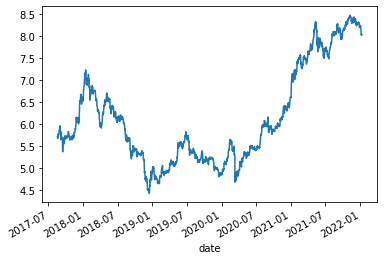

In [35]:
target['log_close'].plot()

In [38]:
target_diff = target.diff(periods=1)
target_diff.dropna(inplace=True)

<AxesSubplot:xlabel='date'>

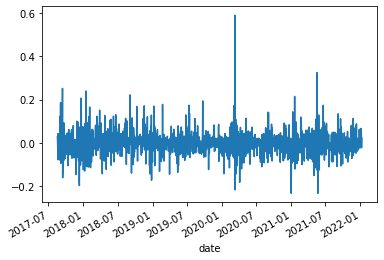

In [40]:
target_diff['log_close'].plot()

In [41]:
score = adfuller(target_diff['log_close'])
score

(-11.8266730866894,
 8.172338395483302e-22,
 9,
 1598,
 {'1%': -3.4344487706424953,
  '5%': -2.8633503662338877,
  '10%': -2.567733803393165},
 -4726.173481244683)

In [42]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

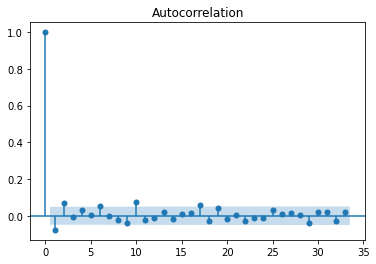

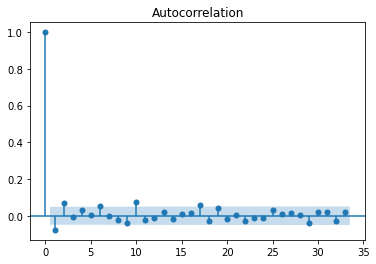

In [45]:
plot_acf(target_diff['log_close'])

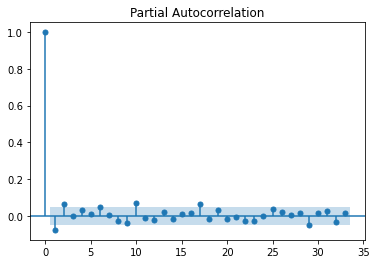

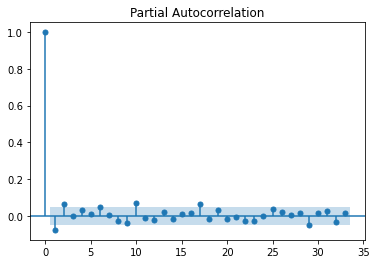

In [46]:
plot_pacf(target_diff['log_close'])

In [47]:
df

,open,high,low,close,Volume ETH
date,,,,,
2022-01-10,3151.97,3185.00,2928.83,3082.68,529818.3866
2022-01-09,3080.98,3211.72,3057.35,3151.97,275874.1643
2022-01-08,3198.68,3250.00,3000.00,3080.95,400692.1061
2022-01-07,3406.81,3416.76,3064.42,3199.24,669631.7262
2022-01-06,3539.82,3550.43,3300.00,3406.81,496745.7413
...,...,...,...,...,...
2017-08-21,299.10,346.52,294.60,323.29,5134.5400
2017-08-20,290.91,300.53,282.85,299.10,2469.4900
2017-08-19,293.96,299.90,278.00,290.91,2140.0800


In [81]:
target = target[::-1]

In [83]:
targ = target[['log_close']]

In [84]:
cutoff = round(targ.shape[0]*0.8)
cutoff

1287

In [85]:
train = targ[:cutoff]
test = targ[cutoff:]

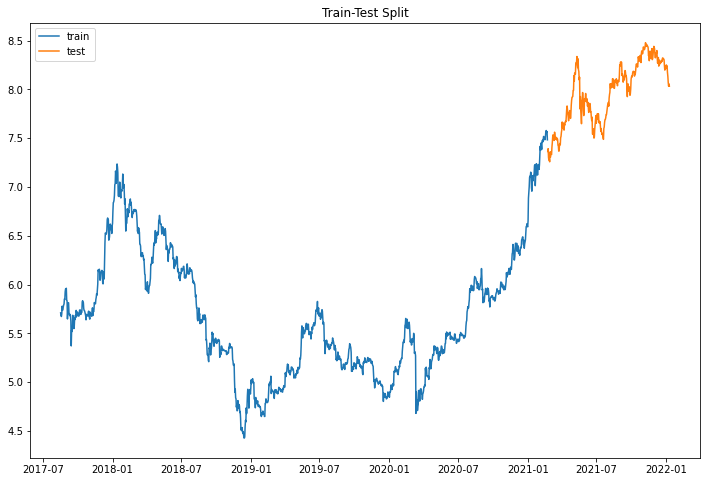

In [86]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [60]:
from statsmodels.tsa.arima.model import ARIMA

In [119]:
train

,log_close
date,
2017-08-17,5.710427
2017-08-18,5.683444
2017-08-19,5.673014
2017-08-20,5.700778
2017-08-21,5.778550
...,...
2021-02-18,7.570242
2021-02-19,7.578145
2021-02-20,7.556428


In [120]:
ar_1 = ARIMA(train, order=(2, 1, 2)).fit()

pred = ar_1.predict(typ='levels')

/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/jeonwookkang/opt/anaconda3/envs/lear

In [121]:
ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              log_close   No. Observations:                 1287
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1926.908
Date:                Fri, 14 Jan 2022   AIC                          -3843.816
Time:                        10:42:57   BIC                          -3818.020
Sample:                             0   HQIC                         -3834.132
                               - 1287                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4224      0.213      1.986      0.047       0.006       0.839
ar.L2          0.4419      0.214      2.062      0.039       0.022       0.862
ma.L1         -0.4915      0.218     -2.255      0.024      -0.919      -0.064
ma.L2         -0.3450      0.223     -1.549      0.121      -0.781       0.091
sigma2         0.0029   4.47e-05     65.334      0.000       0.003       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9485.09
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -1.28
Prob(H) (two-sided):                  0.25   Kurtosis:                        16.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
ar_1.aic

-3843.8161688502914

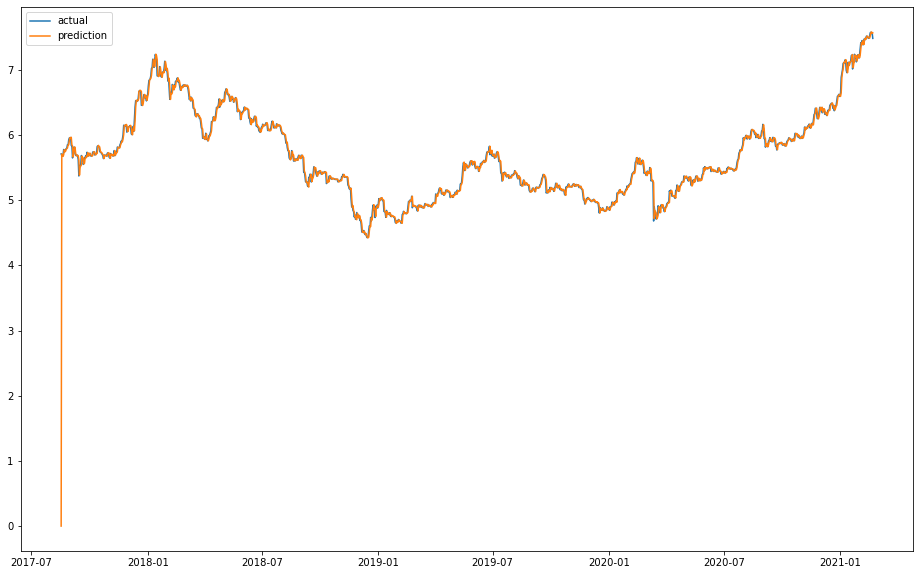

In [123]:
fig, ax = plt.subplots(figsize=(16,10))

ax.plot(train, label='actual')
ax.plot(pred, label='prediction')


plt.legend();

In [100]:
testt = test['log_close']

In [105]:
test = testt.reset_index()

In [107]:
testt = test.set_index('date')

In [108]:
testt

,log_close
date,
2021-02-23,7.363844
2021-02-24,7.392272
2021-02-25,7.300979
2021-02-26,7.275581
2021-02-27,7.284910
...,...
2022-01-06,8.133532
2022-01-07,8.070669
2022-01-08,8.032993


In [106]:
y_hat_test = ar_1.predict(start=test.index[0], end=test.index[-1],typ='levels')

In [124]:
forecast = ar_1.forecast(steps=322)

/Users/jeonwookkang/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1287    7.491778
1288    7.487605
1289    7.489717
1290    7.488765
1291    7.489297
          ...   
1604    7.489581
1605    7.489581
1606    7.489581
1607    7.489581
1608    7.489581
Name: predicted_mean, Length: 322, dtype: float64